In [1]:
import numpy as np
import pandas as pd
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
cardio_data = pd.read_csv("Cardiotocographic.csv")
cardio_data.head()


,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,2.4,64,62,126,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,10.4,130,68,198,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,13.4,130,68,198,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,23.0,117,53,170,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,19.9,117,53,170,1


In [3]:
cardio_data.tail()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
2121,140,0.000000,0.000000,0.007426,0.0,0.0,0.0,79,0.2,25,7.2,40,137,177,2
2122,140,0.000775,0.000000,0.006971,0.0,0.0,0.0,78,0.4,22,7.1,66,103,169,2
2123,140,0.000980,0.000000,0.006863,0.0,0.0,0.0,79,0.4,20,6.1,67,103,170,2
2124,140,0.000679,0.000000,0.006110,0.0,0.0,0.0,78,0.4,27,7.0,66,103,169,2
2125,142,0.001616,0.001616,0.008078,0.0,0.0,0.0,74,0.4,36,5.0,42,117,159,1


In [4]:
cardio_data.describe()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,1.304327
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,1.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,1.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,1.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,3.000000


In [5]:
cardio_data['NSP'].value_counts()

NSP
1    1655
2     295
3     176
Name: count, dtype: int64

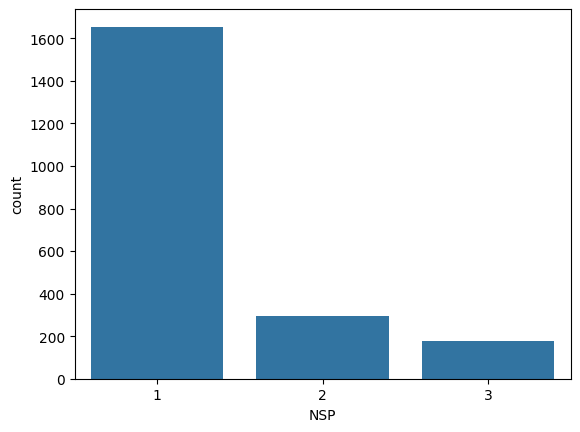

In [6]:
sns.countplot(cardio_data, x='NSP')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
x = cardio_data.drop('NSP', axis=1)
y = cardio_data['NSP'] -1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

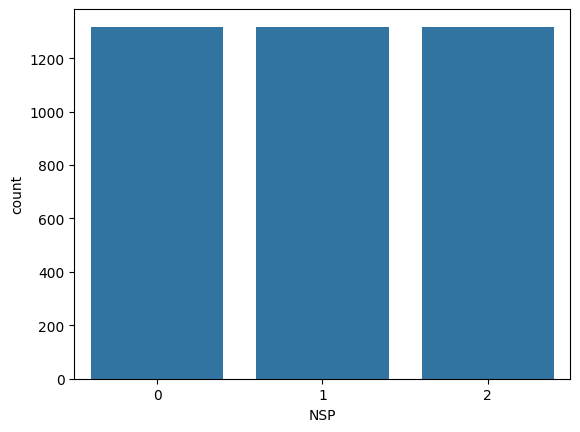

In [8]:
from imblearn.over_sampling import RandomOverSampler
resampler=RandomOverSampler(random_state=0)
X_train_oversampled,y_train_oversampled=resampler.fit_resample(x_train,y_train)
sns.countplot(x=y_train_oversampled)
plt.show()

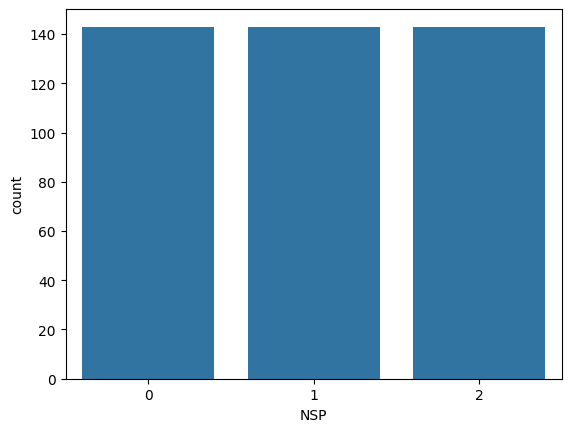

In [9]:
from imblearn.under_sampling import RandomUnderSampler
resampler=RandomUnderSampler(random_state=0)
x_train_undersampled, y_train_undersampled=resampler.fit_resample(x_train,y_train)
sns.countplot(x = y_train_undersampled)
plt.show()

<Axes: xlabel='NSP', ylabel='count'>

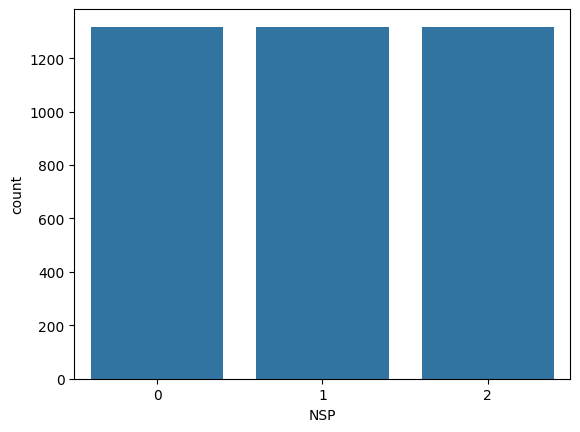

In [10]:
from imblearn.over_sampling import SMOTE
resampler = SMOTE(random_state=0)
x_train_smote, y_train_smote = resampler.fit_resample(x_train, y_train)

sns.countplot(x=y_train_smote)

In [11]:
import tensorflow as tf
model = tf.keras.models.Sequential()

In [12]:
model.add(tf.keras.layers.Dense(9, activation='relu', input_shape=(14,)))
model.add(tf.keras.layers.Dense(3, activation="softmax"))

/Users/oluwadarasimioloyede/mldm/mldmenv2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 9)              │           135 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(x_train, np.asarray( y_train), batch_size = 32, epochs= 100, verbose=2, validation_split=0.2)

Epoch 1/100
43/43 - 0s - 11ms/step - accuracy: 0.3037 - loss: 9.5325 - val_accuracy: 0.5441 - val_loss: 4.9303
Epoch 2/100
43/43 - 0s - 994us/step - accuracy: 0.6588 - loss: 3.9984 - val_accuracy: 0.7265 - val_loss: 2.6788
Epoch 3/100
43/43 - 0s - 942us/step - accuracy: 0.6956 - loss: 2.6430 - val_accuracy: 0.7088 - val_loss: 2.2026
Epoch 4/100
43/43 - 0s - 917us/step - accuracy: 0.7096 - loss: 2.1632 - val_accuracy: 0.7088 - val_loss: 1.8757
Epoch 5/100
43/43 - 0s - 923us/step - accuracy: 0.7176 - loss: 1.7641 - val_accuracy: 0.6971 - val_loss: 1.5873
Epoch 6/100
43/43 - 0s - 932us/step - accuracy: 0.7235 - loss: 1.4564 - val_accuracy: 0.7559 - val_loss: 1.2823
Epoch 7/100
43/43 - 0s - 1ms/step - accuracy: 0.7493 - loss: 1.2372 - val_accuracy: 0.7471 - val_loss: 1.1278
Epoch 8/100
43/43 - 0s - 933us/step - accuracy: 0.7632 - loss: 1.1107 - val_accuracy: 0.7765 - val_loss: 1.0111
Epoch 9/100
43/43 - 0s - 915us/step - accuracy: 0.7735 - loss: 1.0084 - val_accuracy: 0.7706 - val_loss: 0.

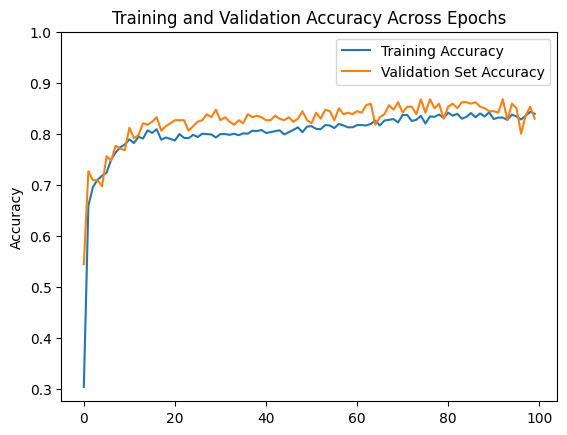

In [16]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
#plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title("Training and Validation Accuracy Across Epochs")
plt.legend()

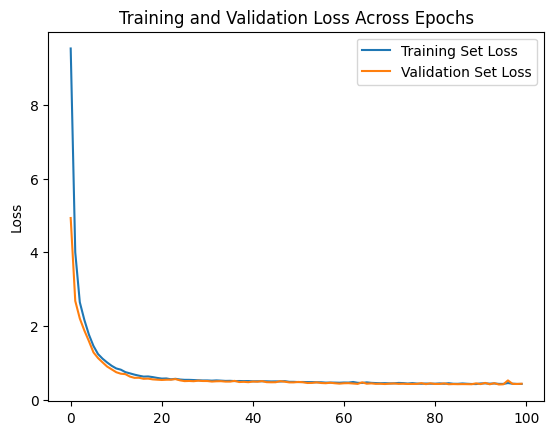

In [17]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title("Training and Validation Loss Across Epochs")
plt.legend()

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


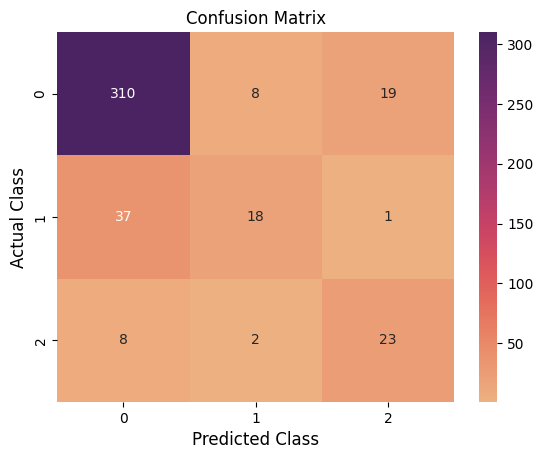

In [20]:
cm = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')

plt.xlabel("Predicted Class", fontsize = 12)
plt.ylabel("Actual Class", fontsize = 12)
plt.title("Confusion Matrix", fontsize = 12)
plt.show()

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       337
           1       0.64      0.32      0.43        56
           2       0.53      0.70      0.61        33

    accuracy                           0.82       426
   macro avg       0.68      0.65      0.64       426
weighted avg       0.82      0.82      0.81       426

